# Heart Disease Prediction 

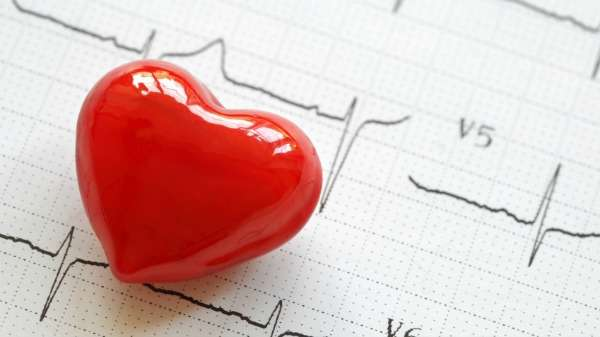

 ### Objective:

In this Machine Learning Project , Main objective is to predict whether the patient has Heart disease or not.I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

### Contents :

    PART1 : Exploratory Data Analysis
    PART2 : Data Cleaning
    PART3 : Data Modelling
    PART4 : Model Validation

### Part 1 - Exploratory Data Analysis

    1) Analysis of the features.

    2) Finding any relations or trends considering multiple features.

#### Import Libraries

Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [1]:
import numpy as np               #To perform mathematical operations
import pandas as pd              #To to read and to manipulate and analyse the data 
import matplotlib.pyplot as plt  #Library used for plotting 2D Graphics
import seaborn as sns            #To plot statistical graphics in python 

In [2]:
df=pd.read_csv('heart.csv')       #Read the dataset using pandas library

In [3]:
df.head()                         #Display the first 5 rows of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


 Attribute Information :
    
1)The above data columns description

2)Age - Numerical data in yrs

3)Sex - female: 0 , male: 1

4)cp - chest pain type

5)trestbps - resting blood pressure (in mm Hg on admission to the hospital)

6)chol - serum cholestoral in mg/dl

7)fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

8)restecg - Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

9)thalach - maximum heart rate achieved

10)exang - exercise induced angina (1 = yes; 0 = no)

11)oldpeak - ST depression induced by exercise relative to rest

12)slope - the slope of the peak exercise ST segment

13)ca - number of major vessels (0-3) colored by flourosopy

14)thal - blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

15)target - have disease or not (1=yes, 0=no)

People suffering from Heart Disease :

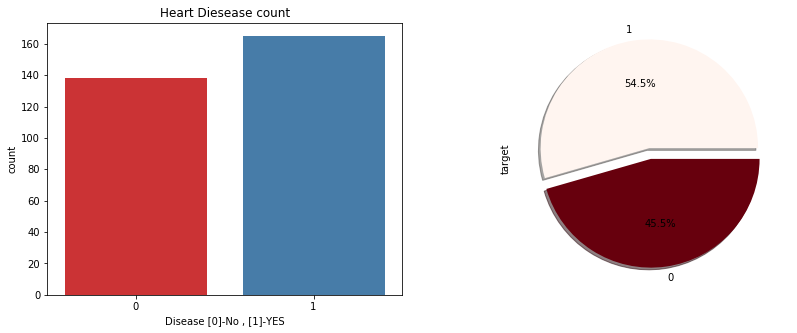

In [5]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='target',data=df,ax=ax[0],palette='Set1')
ax[0].set_xlabel('Disease [0]-No , [1]-YES')
ax[0].set_title('Heart Diesease count')
df['target'].value_counts().plot.pie(ax=ax[1],explode=(0.1,0.0),autopct='%1.1f%%',shadow=True,cmap='Reds')

From the above graph we can see that more that half of the population suffering from heart disease 

FEATURE ANALYSIS :
    
    a) SEX (Category) :

Text(0.5, 1.0, '% Of Men-1 and WOMEN-0 Population')

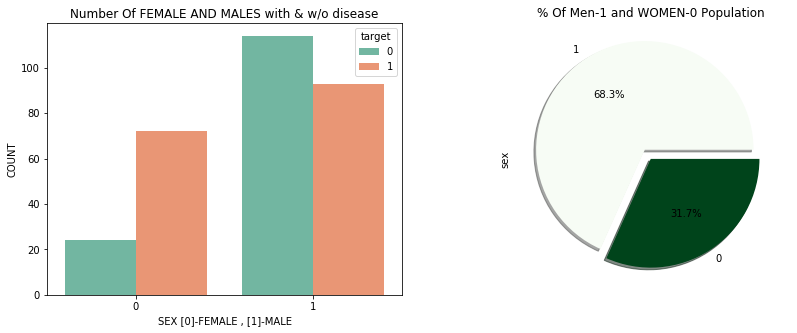

In [6]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=df,ax=ax[0],palette='Set2',hue='target')
ax[0].set_xlabel('SEX [0]-FEMALE , [1]-MALE')
ax[0].set_ylabel('COUNT')
ax[0].set_title('Number Of FEMALE AND MALES with & w/o disease')
df['sex'].value_counts().plot.pie(ax=ax[1],explode=(0.1,0.0),autopct='%1.1f%%',shadow=True,cmap='Greens')
ax[1].set_title('% Of Men-1 and WOMEN-0 Population')

From the above results , it is clear that Men are suffering more with heart disease compared to women which is proportionate to population 

b) FBS (Fasting Blood Sugar) Category :

Text(0.5, 1.0, '% of having sugar >120(1) , having sugar <120 (0)')

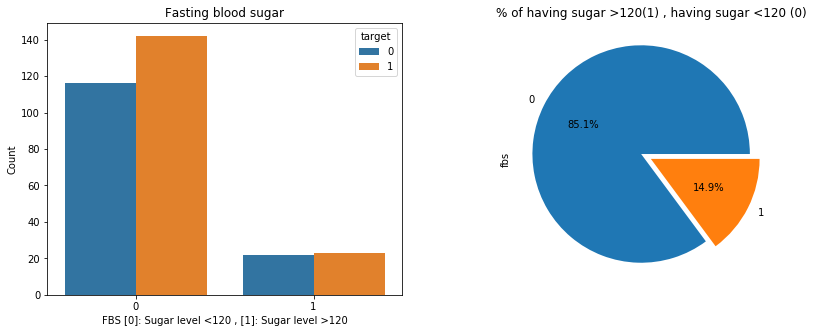

In [7]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=df,hue='target',ax=ax[0])
ax[0].set_xlabel('FBS [0]: Sugar level <120 , [1]: Sugar level >120')
ax[0].set_ylabel('Count')
ax[0].set_title('Fasting blood sugar')
df['fbs'].value_counts().plot.pie(ax=ax[1],explode=(0.1,0.0),autopct='%1.1f%%')
ax[1].set_title('% of having sugar >120(1) , having sugar <120 (0)')

From the above picture , it is strange that more people whose sugar level is <120 got attacked by heat diseases when compared with >120 fbs people.

c) restecg (Resting Electro Cardiographic Results , Values: 0,1,2 category ) :

Text(0.5, 1.0, 'Resting Electro Cardiographic')

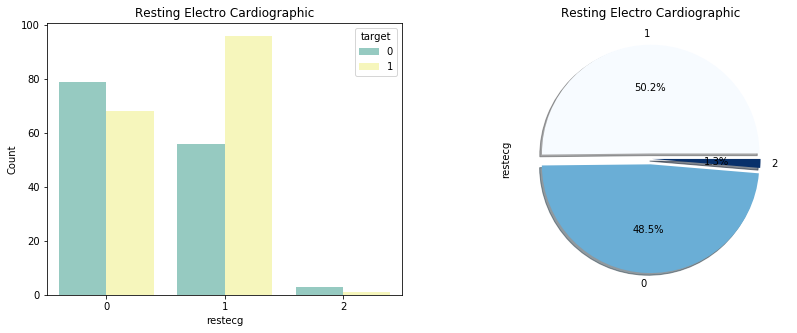

In [8]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=df,hue='target',ax=ax[0],palette='Set3')
ax[0].set_xlabel('restecg')
ax[0].set_ylabel('Count')
ax[0].set_title('Resting Electro Cardiographic')
df['restecg'].value_counts().plot.pie(ax=ax[1],explode=(0.05,0.05,0.01),autopct='%1.1f%%',shadow=True,cmap='Blues')
ax[1].set_title('Resting Electro Cardiographic')

An electrocardiogram (ECG) is a test which measures the electrical activity of your heart to show whether or not it is working normally. An ECG records the heart's rhythm and activity on a moving strip of paper or a line on a screen. 

With above graph as a refrence we can say that if resting electrocardiographic is 1 then person have more chances of suffering from Heart Disease

d) slope - the slope of the peak exercise ST segment

Text(0.5, 1.0, 'slope of the peak exercise ST segment')

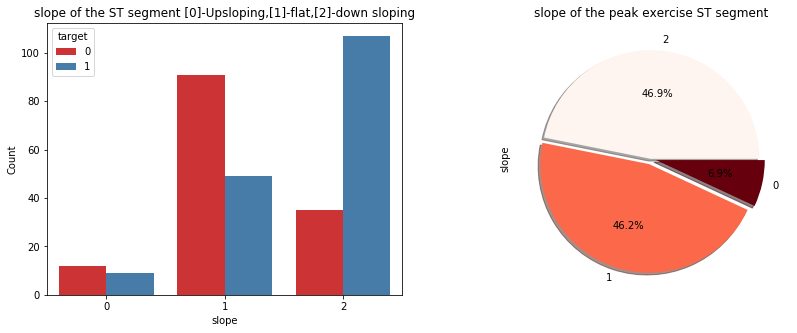

In [9]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='slope',data=df,hue='target',ax=ax[0],palette='Set1')
ax[0].set_xlabel('slope')
ax[0].set_ylabel('Count')
ax[0].set_title('slope of the ST segment [0]-Upsloping,[1]-flat,[2]-down sloping')
df['slope'].value_counts().plot.pie(ax=ax[1],explode=(0.0005,0.05,0.05),autopct='%1.1f%%',shadow=True,cmap='Reds')
ax[1].set_title('slope of the peak exercise ST segment')

From the above figure as reference , people having down sloping are more affected by Heart Disease

e) Number of major vessels (0-3 colored flouroscopy category)

Text(0.5, 1.0, 'Number of major vessels')

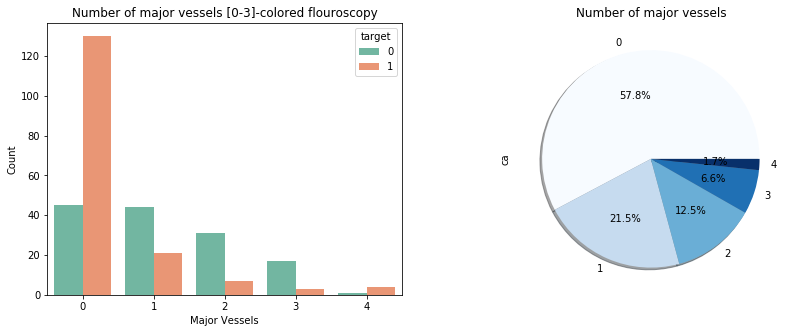

In [10]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='ca',data=df,hue='target',ax=ax[0],palette='Set2')
ax[0].set_xlabel('Major Vessels')
ax[0].set_ylabel('Count')
ax[0].set_title('Number of major vessels [0-3]-colored flouroscopy')
df['ca'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Blues')
ax[1].set_title('Number of major vessels')

Since Fluoroscopy use to produce x-ray which will makes possible to see internal organs in motion. Fluoroscopy uses x-ray to produce real-time video images.

f) thal 3 = normal, 6 = fixed defect, 7 = reversable defect (category)

Text(0.5, 1.0, 'Thal 3 = normal, 6 = fixed defect, 7 = reversable defect (category)')

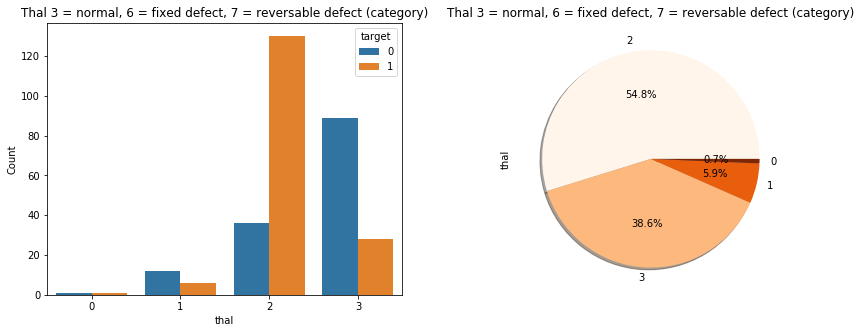

In [11]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thal',data=df,hue='target',ax=ax[0])
ax[0].set_xlabel('thal')
ax[0].set_ylabel('Count')
ax[0].set_title('Thal 3 = normal, 6 = fixed defect, 7 = reversable defect (category)')
df['thal'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Oranges')
ax[1].set_title('Thal 3 = normal, 6 = fixed defect, 7 = reversable defect (category)')

g) Chest pain category :

Text(0.5, 1.0, 'Chest Pain Analysis')

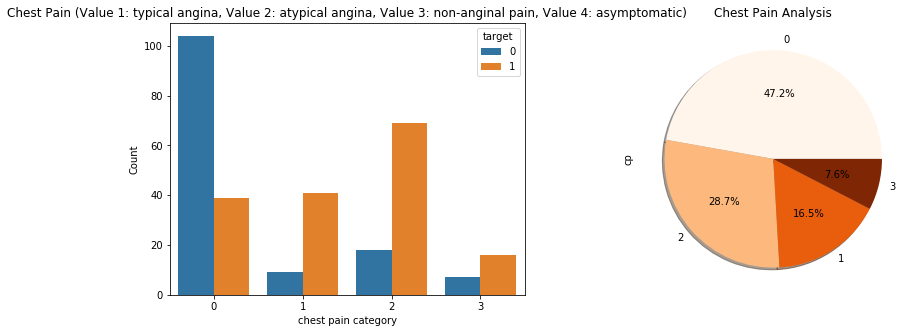

In [12]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=df,hue='target',ax=ax[0])
ax[0].set_xlabel('chest pain category')
ax[0].set_ylabel('Count')
ax[0].set_title('Chest Pain (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)')
df['cp'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Oranges')
ax[1].set_title('Chest Pain Analysis')

From the above pie chart , people with 3rd level of chest pain are less compared to second which seems most people dies after 2nd level and so from the countplot more heart diseases are getting attacked to 2nd level of chest pain 

h) Trestbps(Continuous Feature)

Text(0.5, 1.0, 'trestbpss v/s ca')

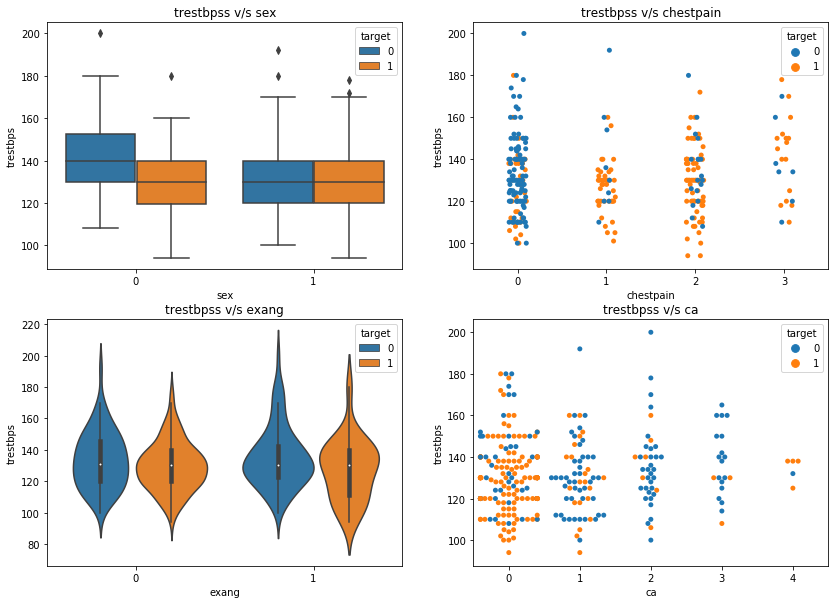

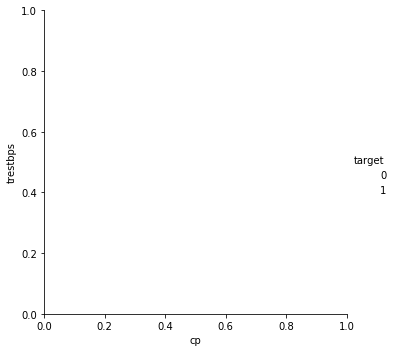

In [13]:
fig , ax = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='trestbps',x='sex',data=df,hue='target',ax=ax[0,0])
ax[0,0].set_xlabel('sex')
ax[0,0].set_ylabel('trestbps')
ax[0,0].set_title('trestbpss v/s sex')

sns.catplot(y='trestbps',x='cp',data=df,hue='target',ax=ax[0,1])
ax[0,1].set_xlabel('chestpain')
ax[0,1].set_ylabel('trestbps')
ax[0,1].set_title('trestbpss v/s chestpain')

sns.violinplot(y='trestbps',x='exang',data=df,hue='target',ax=ax[1,0])
ax[1,0].set_xlabel('exang')
ax[1,0].set_ylabel('trestbps')
ax[1,0].set_title('trestbpss v/s exang')

sns.swarmplot(y='trestbps',x='ca',data=df,hue='target',ax=ax[1,1])
ax[1,1].set_xlabel('ca')
ax[1,1].set_ylabel('trestbps')
ax[1,1].set_title('trestbpss v/s ca')

Based on the above analysis , gender and exang are playing minor role wrt blood pressure ... but chestpain is playing vital role i.e., if chest pain increases , blood pressure also increases which increases the heart diseases. 

i) cholestrol (continuous feature)

Text(0.5, 1.0, 'Cholestrol V/S Thal')

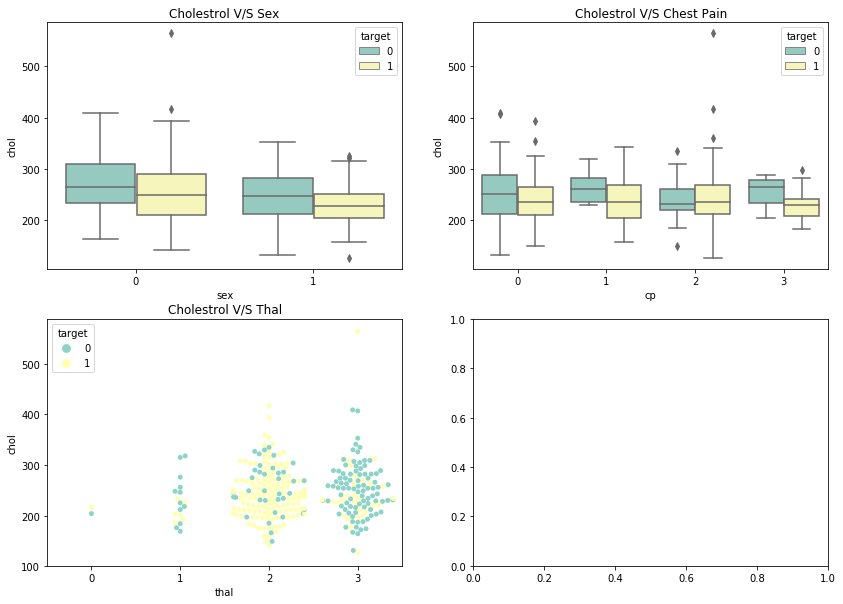

In [14]:
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='chol',data=df,x='sex',hue='target',palette='Set3',ax=ax[0,0])
ax[0,0].set_title("Cholestrol V/S Sex")
sns.boxplot(y='chol',data=df,x='cp',hue='target',ax=ax[0,1],palette='Set3')
ax[0,1].set_title("Cholestrol V/S Chest Pain")
sns.swarmplot(y='chol',data=df,x='thal',hue='target',ax=ax[1,0],palette='Set3')
ax[1,0].set_title("Cholestrol V/S Thal")

j) Oldpeak (Continuous feature)



Text(0.5, 1.0, 'oldpeak V/S CA')

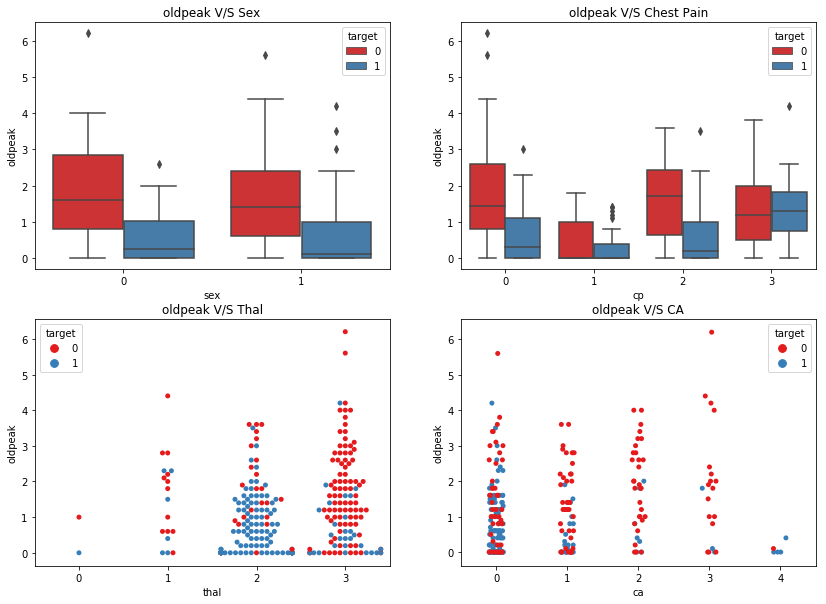

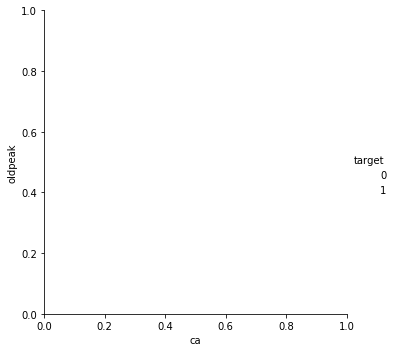

In [15]:
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='oldpeak',data=df,x='sex',hue='target',palette='Set1',ax=ax[0,0])
ax[0,0].set_title("oldpeak V/S Sex")
sns.boxplot(y='oldpeak',data=df,x='cp',hue='target',ax=ax[0,1],palette='Set1')
ax[0,1].set_title("oldpeak V/S Chest Pain")
sns.swarmplot(y='oldpeak',data=df,x='thal',hue='target',ax=ax[1,0],palette='Set1')
ax[1,0].set_title("oldpeak V/S Thal")
sns.catplot(y='oldpeak',data=df,x='ca',hue='target',ax=ax[1,1],palette='Set1')
ax[1,1].set_title("oldpeak V/S CA")

#### Distribution of each featue

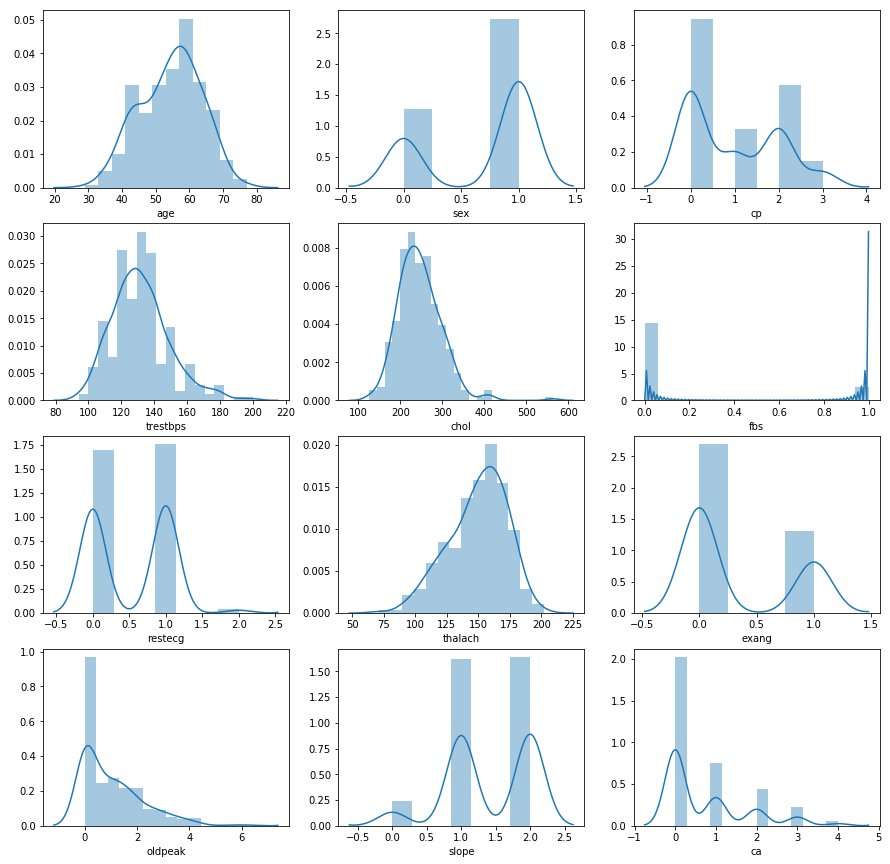

In [16]:
fig,ax = plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(df.iloc[:,i],kde=True)

In [17]:
feature = df.columns
feature
df[feature].mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

#### PLOT WRT MEAN OF EACH ROW

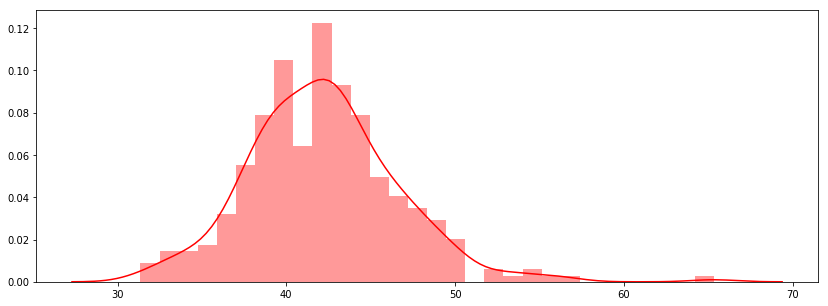

In [18]:
fig , ax = plt.subplots(1,1,figsize=(14,5))
features = df.columns
sns.distplot(df[features].mean(axis=1),kde=True,bins=30,color='red')

#### Plot Wrt Standard Deviation per row

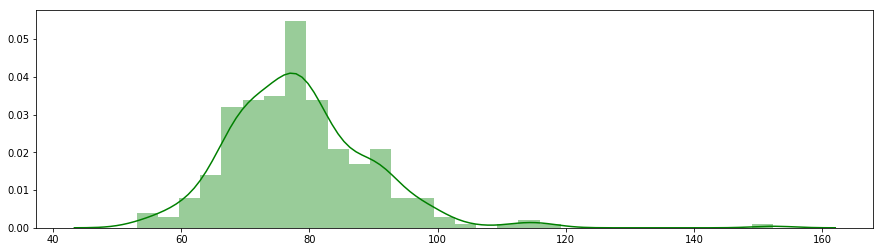

In [19]:
fig , ax = plt.subplots(1,1,figsize=(15,4))
features = df.columns
sns.distplot(df[feature].std(axis=1),kde=True,bins=30,color='green')

### PART2 : DATA CLEANING

Handling Missing Data

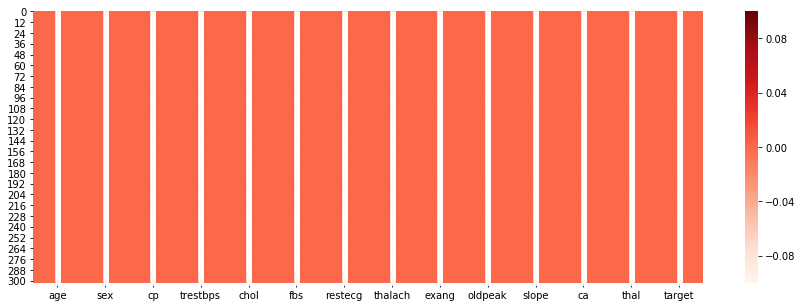

In [20]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(df.isnull(),annot=True,cmap='Reds')

It's really nice that the data doesn't have any missing data

#### Feature conversion  :

In [21]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [22]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()

In [24]:
df.sex = df.sex.astype('category')
df.cp = df.cp.astype('category')
df.fbs = df.fbs.astype('category')
df.restecg = df.restecg.astype('category')
df.exang = df.exang.astype('category')
df.slope = df.slope.astype('category')
df.ca = df.ca.astype('category')
df.thal = df.thal.astype('category')

In [25]:
x=df.drop(columns='target')
x.iloc[2:4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2


In [26]:
y=df['target']
y.iloc[2:4]

2    1
3    1
Name: target, dtype: int64

In [27]:
y=pd.DataFrame(y)
y.iloc[2:4]

,target
2,1
3,1


#### Creating Dummy Variables

In [28]:
x = pd.get_dummies(x,drop_first=True)
x.head() , y.head()

(   age  trestbps  chol  thalach  oldpeak  sex_1  cp_1  cp_2  cp_3  fbs_1  ...  \
 0   63       145   233      150      2.3      1     0     0     1      1  ...   
 1   37       130   250      187      3.5      1     0     1     0      0  ...   
 2   41       130   204      172      1.4      0     1     0     0      0  ...   
 3   56       120   236      178      0.8      1     1     0     0      0  ...   
 4   57       120   354      163      0.6      0     0     0     0      0  ...   
 
    exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  thal_3  
 0        0        0        0     0     0     0     0       1       0       0  
 1        0        0        0     0     0     0     0       0       1       0  
 2        0        0        1     0     0     0     0       0       1       0  
 3        0        0        1     0     0     0     0       0       1       0  
 4        1        0        1     0     0     0     0       0       1       0  
 
 [5 rows x 22 columns], 

#### Normalization (To make or scale values between 0 and 1)

In [29]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head(5)

C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### PART 3 : DATA MODELING 

#### Splitting the data into train and test set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=0)

#### Importing ML Libraries 

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### Import Model Evaluation libraries (to check model performance) 

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score

### Model a) Stochastic Gradient Descent 

In [34]:
sgd = SGDClassifier(tol=1e-10, alpha=0.2)
sgd.fit(x_train,y_train)

C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.2, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=1e-10,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
y_pred = sgd.predict(x_test)

In [36]:
y_pred = y_pred.reshape(-1,1)

In [37]:
y_pred = pd.DataFrame(y_pred)

In [38]:
y_pred[0:3]

,0
0,0
1,0
2,0


In [39]:
y_test[0:3]

,target
225,0
152,1
228,0


### PART 4 : Model Validation

In [40]:
print(accuracy_score(y_test,y_pred))

0.7763157894736842


In [41]:
y_test_count = y_test['target'].value_counts()
y_test_count

1    43
0    33
Name: target, dtype: int64

Below % of 1s calculation through mean

In [42]:
mean_ones = y_test['target'].mean()

In [43]:
mean_ones

0.5657894736842105

% of 0s calculation is below

In [44]:
mean_zeros = 1-y_test['target'].mean()

In [45]:
mean_zeros

0.4342105263157895

Calculate Null Accuracy in a single line of code

In [46]:
max(mean_ones,mean_zeros)

0.5657894736842105

In [47]:
y_test_count.head(1)/len(y_test)

1    0.565789
Name: target, dtype: float64

classification accuracy is the easiet classification metrics to understand , but it doesnt tell you the underlying distribution response values

#### Confusion Matrix

In [48]:
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

[[26  7]
 [10 33]]


Basic terminology

True Positives (TP): we correctly predicted that they do have heart disease - 43

True Negatives (TN): we correctly predicted that they don't have heart disease - 22
 
False Positives (FP): we incorrectly predicted that they do have heat disease (a "Type I error") - 22
Falsely predict positive (Type I error)

False Negatives (FN): we incorrectly predicted that they don't have heart disease (a "Type II error") - 4
Falsely predict negative (Type II error)

#### Classification Accuracy 

In [49]:
print((TP+TN)/float(TP+TN+FP+FN))
sgd_auc = (accuracy_score(y_test,y_pred))
print(sgd_auc)

0.7763157894736842
0.7763157894736842


Classification Error / Miscalssification Rate - How often the classification is wrong 

In [50]:
print((FP+FN)/float(TP+TN+FP+FN))

0.2236842105263158


Sensitivity / True positive rate / Recall -  When the actual value is positive, how often the prediction is correct

In [51]:
sensitivity = TP/(TP+FN)
print(sensitivity)
print(recall_score(y_test,y_pred))

0.7674418604651163
0.7674418604651163


Specificity   - When the actual value is negative how often the predictition is correct

In [52]:
specificity = (TN/float(FP+TN))
print(specificity)

0.7878787878787878


False Positive Rate  - When the actual value is negative , how often the prediction is incorrect 

In [53]:
print(FP/float(FP+TN))
print(1-specificity)

0.21212121212121213
0.21212121212121215


Precision - When a positive value is predicted, how often is the prediction correct?
How "precise" is the classifier when predicting positive instances?

In [54]:
precision = TP/float(TP+FP)
print(precision)

0.825


#### Receiver Operating Charecteristics (ROC) Curves :
roc_curve returns 3 objects fpr, tpr, thresholds

fpr: false positive rate

tpr: true positive rate

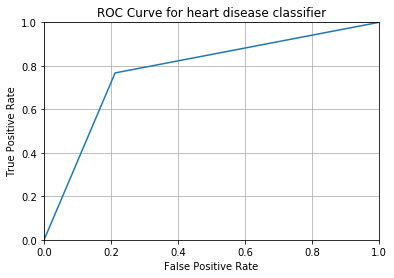

In [55]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for heart disease classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

AUC Score -  AUC is the percentage of the ROC plot that is underneath the curve

In [56]:
print(roc_auc_score(y_test,y_pred))

0.7776603241719521


### Model b) K-Nearest Neighbors 

In [57]:
knn=KNeighborsClassifier()

In [58]:
knn.fit(x_train,y_train)

C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
y_pred1 = knn.predict(x_test)

In [60]:
y_pred1[0:3]

array([0, 0, 1], dtype=int64)

In [61]:
y_pred1 = pd.DataFrame(y_pred1)

In [62]:
y_pred1[0:3]

,0
0,0
1,0
2,1


#### Confusion Matrix :

In [63]:
confusion1 = confusion_matrix(y_test,y_pred1)
print(confusion1)
TP = confusion1[1,1]
TN = confusion1[0,0]
FP = confusion1[0,1]
FN = confusion1[1,0]

[[23 10]
 [ 6 37]]


#### KNN Accuracy 

In [64]:
print(accuracy_score(y_test,y_pred1))
KNN_auc = ((TP+TN)/float(TP+TN+FP+FN))
print(KNN_auc)

0.7894736842105263
0.7894736842105263


precision

In [65]:
precision = TP/float(TP+FP)
print(precision)

0.7872340425531915


recall / TPR

In [66]:
recall = TP/(TP+FN)
print(recall)
print(recall_score(y_test,y_pred1))

0.8604651162790697
0.8604651162790697


False Positive Rate

In [67]:
fpr=(FP/float(FP+TN))
print(fpr)

0.30303030303030304


ROC Curve 

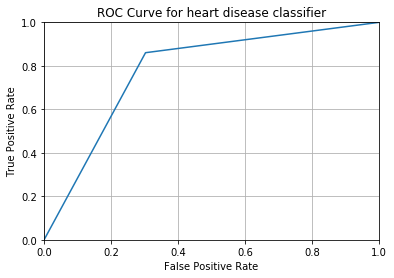

In [68]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred1)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for heart disease classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [69]:
print(roc_auc_score(y_test,y_pred1))

0.7787174066243834


### Model c) Logistic Regression

In [70]:
lr = LogisticRegression(class_weight='balanced',random_state=0,tol=1e-10)

In [71]:
lr.fit(x_train,y_train)

C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=1e-10, verbose=0, warm_start=False)

In [72]:
y_pred2 = lr.predict(x_test)

In [73]:
y_pred2[0:3]

array([0, 0, 0], dtype=int64)

In [74]:
y_pred2 = pd.DataFrame(y_pred2)
y_pred2[0:3]

,0
0,0
1,0
2,0


#### Confusio Matrix of Logistic Regression:

In [75]:
confusion2 = confusion_matrix(y_test,y_pred2)
print(confusion2)
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

[[27  6]
 [ 6 37]]


#### Logistic Model Accuracy 

In [76]:
print(accuracy_score(y_test,y_pred2))
log_auc = ((TP+TN)/float(TP+TN+FP+FN))
print(log_auc)

0.8421052631578947
0.8421052631578947


Precision 

In [77]:
precision = print(TP/float(TP+FP))
precision

0.8604651162790697


Recall / True Positive Rate

In [78]:
recall = print(TP/float(TP+FN))
recall

0.8604651162790697


False Positive Rate 

In [79]:
fpr = print(FP/float(FP+TN))
fpr

0.18181818181818182


ROC Curve

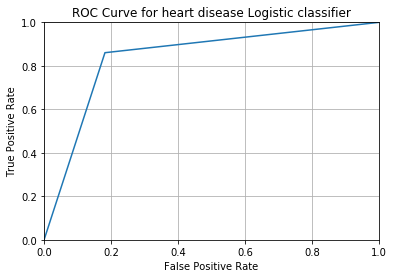

In [80]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred2)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for heart disease Logistic classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [81]:
print(roc_auc_score(y_test,y_pred2))

0.8393234672304439


### Model d) Random Forest Classifier

In [82]:
rf = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=22)
rf.fit(x_train,y_train)

C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

In [83]:
y_pred3 = rf.predict(x_test)
y_pred3[0:3]

array([0, 1, 1], dtype=int64)

In [84]:
y_pred3 = pd.DataFrame(y_pred3)
y_pred3[0:3]

,0
0,0
1,1
2,1


#### Confusion Matrix

In [85]:
confusion3 = confusion_matrix(y_test,y_pred3)
print(confusion3)
TP = confusion3[1,1]
TN = confusion3[0,0]
FP = confusion3[0,1]
FN = confusion3[1,0]

[[25  8]
 [ 6 37]]


#### Random Forest Classifier Accuracy 

In [86]:
print(accuracy_score(y_test,y_pred3))
rfc_auc = ((TP+TN)/float(TP+TN+FP+FN))
print(rfc_auc)

0.8157894736842105
0.8157894736842105


Precison 

In [87]:
precison = print(TP/float(TP+FP))
precision

0.8222222222222222


Recall / True Positive Rate 

In [88]:
recall = print(TP/float(TP+FN))
recall

0.8604651162790697


False Positive Rate 

In [89]:
fpr = print(FP/float(FP+TN))
fpr

0.24242424242424243


ROC Curve 

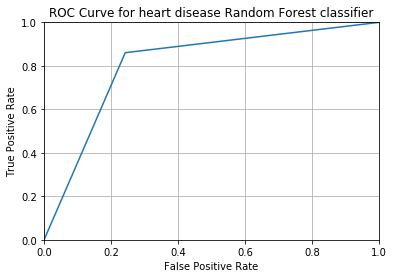

In [90]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred3)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for heart disease Random Forest classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [91]:
AUC_Score = roc_auc_score(y_test,y_pred3)
AUC_Score

0.8090204369274137

#### Finding out the best predictive model with respect to Acuracy 

In [92]:
print(f'Accuracy score of Sophisticated Gradient Model : {round((sgd_auc)*100)} %')
print(f'Accuracy score of KNN classifier Model : {round((KNN_auc)*100)} %')
print(f'Accuracy score of Logistic Classifier Model : {((log_auc)*100)} %')
print(f'Accuracy score of Random Forest Classifier : {((rfc_auc)*100)} %')

Accuracy score of Sophisticated Gradient Model : 78.0 %
Accuracy score of KNN classifier Model : 79.0 %
Accuracy score of Logistic Classifier Model : 84.21052631578947 %
Accuracy score of Random Forest Classifier : 81.57894736842105 %


### PART 5 - Conclusion :

1) Logistic Regression gives the best accurate model when compared to sophisticated , KNN and Random forest classifiers

2) Visualizing Data helped us alot to identify the patterns of data